<a href="https://colab.research.google.com/github/oliviachioccariello/NEUR265/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Olivia Chioccariello##
*Neur 265*

**3/2/2023**


In [2]:
import pandas as pd #import numpy
import matplotlib.pyplot as plt   #import matplot
import scipy.stats as stats   #import scipy

In [3]:
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url) #import patch_seq_expanded.csv as a pandas dataframe 

In [4]:
patch_seq['ISI'] = patch_seq['ISI'].fillna(0) #get rid of empty values

<Axes: >

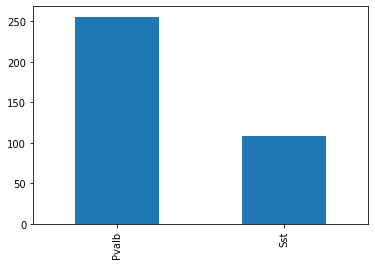

In [5]:
df_patch = pd.DataFrame(patch_seq) #make variable df_patch refer to the patch_seq dataframe
df_patch['Marker'].value_counts().plot(kind='bar') #graph bar plot

<Axes: ylabel='Marker'>

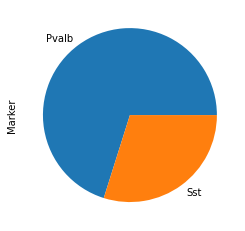

In [6]:
df_patch = pd.DataFrame(patch_seq)
df_patch['Marker'].value_counts().plot(kind='pie') #make a pie chart

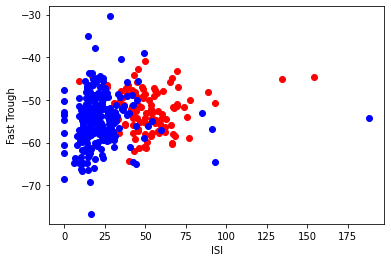

In [7]:
Sst = df_patch[df_patch['Marker'] == 'Sst']
Pvalb = df_patch[df_patch['Marker'] == 'Pvalb']
Marker = df_patch['Marker'].unique()

fig = plt.figure()
for d_type in Marker: #make a "for" loop

  df = df_patch[df_patch['Marker'] == d_type] #define variable df

  if d_type == 'Sst':    #Make Sst Data points appear red
    plt.scatter(df['ISI'], df['Fast_Trough'],
              label=d_type, color="red")
    
  elif d_type == 'Pvalb':   #Make Pvalb data points appear blue
     plt.scatter(df['ISI'], df['Fast_Trough'],
              label=d_type, color="blue")
   
plt.ylabel("Fast Trough") #label y axis
plt.xlabel("ISI") #label x axis
    
plt.show() #show plot

In [8]:
def patchScatter(): #define variable "patchscatter()" to output scatter plot from above
  Sst = df_patch[df_patch['Marker'] == 'Sst']
  Pvalb = df_patch[df_patch['Marker'] == 'Pvalb']
  Marker = df_patch['Marker'].unique()

  fig = plt.figure()
    
  for d_type in Marker:
 
    df= df_patch[df_patch['Marker'] == d_type]

    if d_type == 'Sst':    
      plt.scatter(df['ISI'], 
              df['Fast_Trough'],
              label=d_type, color="red")
    elif d_type == 'Pvalb':
        plt.scatter(df['ISI'],
              df['Fast_Trough'],
              label=d_type, color="blue")
   
  plt.ylabel("Fast Trough")
  plt.xlabel("ISI")
    
  plt.show()

In [9]:
patch_seq.groupby('Marker')['Fast_Trough'].describe() #describe the data in patch_seq 

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


10.Pvalb neurons have a lower mean of -54 compared to Sst's mean of -52. The Pvalb group has a more negative undershoot than the Sst group because it has a more negative minimum value and because it has a more negative mean, it proves that the Pvalb group also has more negative values. 

In [10]:
patch_seq.groupby('Marker')['Fast_Trough'].skew() # run test to return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. 

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

12. The results of my skewness test for Fast_Trough values resulted in a skewed distribution for Pvalb and a normal distribution for Sst. The number for Pvalb was greater than 0.05, indicating a skewed distribution, and the number for Sst lied between -0.5 and 0.5, indicating a normal distributon. 

In [11]:
patch_seq.groupby('Marker')['ISI'].skew() # run test to return skewness of the "ISI" column for "Sst" neurons and "Pvalb" neurons 

Marker
Pvalb    5.200362
Sst      1.857850
Name: ISI, dtype: float64


14. The results of my skewness test for ISI resulted in both Pvalb and Sst being skewed distributions. Both the value for Pvalb and Sst were greater than 0.05, indicating skewed distribution. 

In [12]:
sst_neurons = patch_seq[patch_seq['Marker']=='Sst'] #isolate Sst group into separate variable
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb'] #isolate Pvalb group into separate variable

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough']) #run independent t-test to compare "Fast_Trough" Values between Sst and Pvalb

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

16. The results of my t-test for my Fast_Trough values show statisitcal signifiance because the pvalue is less than 0.05 This indicates that the undershoot voltage does significantly differ between the Sst neurons and the Pvalb neurons. 

In [13]:
sst_neurons = patch_seq[patch_seq['Marker']=='Sst'] #isolate Sst group into separate variable
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb'] #isolate Pvalb group into separate variable

stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI']) #run independent t-test to compare "ISI" values between Sst and Pvalb

Ttest_indResult(statistic=15.004913280678535, pvalue=6.160372584319923e-40)


18. The results of my t-test for ISI values shows that there is no statistical significance between the groups because the pvalue is greater than 0.05. This indicates that the undershoot voltage does not significantly diffe4r between the Sst and the Pvalb neurons. 